In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('.../winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Input features/variables :

- fixed acidity
- volatile acidity
- citric acid
- residual sugar 
- chlorides 
- free sulfur dioxide 
- total sulfur dioxide 
- density
- pH
- sulphates
- alcohol

Target variable: 
- quality

In [4]:
# check for null values 
df.columns[df.isnull().any()]

Index([], dtype='object')

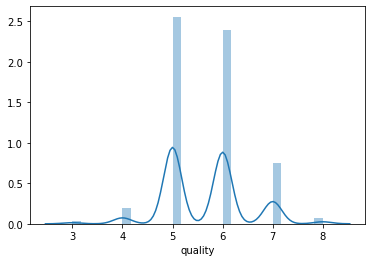

In [5]:
# Check the distribution of target variable 
sns.distplot(df['quality'])

In [6]:
df.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

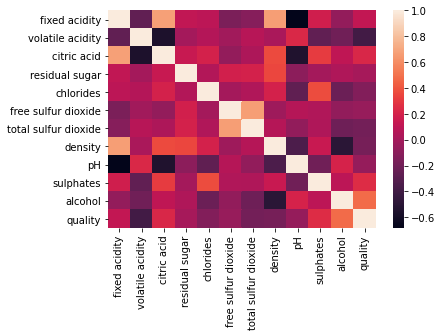

In [7]:
sns.heatmap(df.corr())

In [0]:
# Feature selection 
# Function that gives us only those features that have a correlation above a certain threshold 

correlations = df.corr()['quality']

def extract_features(threshold, correlations):
  abs_correlation = correlations.abs()
  high_correlation = abs_correlation[abs_correlation>threshold].index.values.tolist()
  return high_correlation


In [9]:
# Extracting features with threshold 0.05
features = extract_features(0.05, correlations)
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [0]:
features.remove('quality')

In [0]:
X = df[features]
y = df['quality']

In [0]:
# Splitting the data into training and testing sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Linear Regression 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
regressor.coef_

array([ 2.03212847e-02, -1.15501922e+00, -1.62346410e-01, -1.88301258e+00,
        3.35989090e-03, -2.76024426e-03, -7.08071860e+00, -3.74933275e-01,
        8.80045728e-01,  2.92409394e-01])

In [0]:
y_pred_train = regressor.predict(X_train)

In [0]:
y_pred_test = regressor.predict(X_test)

In [17]:
# Evaluating model performance 

from sklearn.metrics import mean_squared_error
# train RMSE
train_rmse = mean_squared_error(y_pred_train, y_train) ** 0.5
train_rmse

0.6532578944161916

In [18]:
# test RMSE 
test_rmse = mean_squared_error(y_pred_test, y_test) ** 0.5
test_rmse

0.6175965023435614

In [0]:
# As we can see, the train and test root mean squared error are close to each other indicating that the model is fairly accurate.